In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
dump_path1='./data/nyhouse_train.pkl'
nyhouse_df=pickle.load(open(dump_path1,'rb'))   
nyhouse_df.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,5.831328,19.212182,2,7,5,2003,2003,8.059126,4,3,...,0,0,1,0,0,0,0,1,0,12.247699
1,6.221214,19.712205,3,6,8,1976,1976,0.000000,3,3,...,0,0,1,0,0,0,0,1,0,12.109016
2,5.914940,20.347241,2,7,5,2001,2002,7.646538,4,3,...,0,0,1,0,0,0,0,1,0,12.317171
3,5.684507,19.691553,3,7,5,1915,1970,0.000000,3,3,...,0,0,1,1,0,0,0,0,0,11.849405
4,6.314735,21.325160,4,8,5,2000,2000,9.391827,4,3,...,0,0,1,0,0,0,0,1,0,12.429220


In [3]:
train = nyhouse_df.iloc[:,:-1].values
label = nyhouse_df.iloc[:,-1].values
print(train.shape)
print(label.shape)

(1458, 277)
(1458,)


In [4]:
Xtrain,Xtest,ytrain,ytest = train_test_split(train,label,test_size=0.25,random_state=0)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1093, 277)
(365, 277)
(1093,)
(365,)


In [5]:
from ensembler import StackingAverageModels
from FeatureLearner.SampleLearner import SampleRegressioner
from FeatureLearner.PointLearner import PointRegressioner
from sklearn.decomposition import PCA

In [6]:
X_train, X_test, y_train, y_test = Xtrain, Xtest, ytrain, ytest
def gridsearch_result_nyhouse(model,params):
    model_gscv = GridSearchCV(model,params,cv=5)
    model_gscv.fit(X_train,y_train)
    y_pred = model_gscv.predict(X_test)
    score = mean_squared_error(y_test,y_pred)
    print(model_gscv.best_params_)
    return score

def cv_score(model):
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='mean_squared_error')
    return score.mean()

def generate_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test,y_pred)

In [7]:
'''
param = {'C':[0.01,0.1,1,10,100,1e3],'gamma':[0.01,0.05,0.1,0.5]}
SVr_rbf = SVR(kernel='rbf')
print(gridsearch_result_nyhouse(SVr_rbf,param))

SVr_poly = SVR(kernel='poly')
param = {'C':[10,100,1e3],'degree':[2,3]}
print(gridsearch_result_nyhouse(SVr_poly,param))
'''

"\nparam = {'C':[0.01,0.1,1,10,100,1e3],'gamma':[0.01,0.05,0.1,0.5]}\nSVr_rbf = SVR(kernel='rbf')\nprint(gridsearch_result_nyhouse(SVr_rbf,param))\n\nSVr_poly = SVR(kernel='poly')\nparam = {'C':[10,100,1e3],'degree':[2,3]}\nprint(gridsearch_result_nyhouse(SVr_poly,param))\n"

In [8]:
ridge = Ridge(alpha = 10, fit_intercept = False, tol = 0.001)
lasso = Lasso(alpha = 0.0001, fit_intercept = True, tol = 0.0002)
elasnet = ElasticNet(alpha = 0.0001, fit_intercept = True, l1_ratio = 0.9, tol= 0.001)
svr = SVR(kernel = 'rbf', C=1e3, gamma=0.01)
SLR = SampleRegressioner(model=ridge)
PTR = PointRegressioner(model=ridge)
pca = PCA(n_components=50)
rf = RandomForestRegressor(n_estimators= 500, max_depth=5, n_jobs=-1)
stack = RandomForestRegressor(n_estimators=1000, max_depth=10, oob_score=True, n_jobs=-1)

Layer 1:
CV Score: -0.011223, Test Score: 0.013267
Layer 2:
CV Score: -0.007035, Test Score: 0.014109
Layer 3:
CV Score: -0.005126, Test Score: 0.015079
Layer 4:
CV Score: -0.003886, Test Score: 0.015200
Layer 5:
CV Score: -0.003046, Test Score: 0.015835
Layer 6:
CV Score: -0.002495, Test Score: 0.016437
Layer 7:
CV Score: -0.002180, Test Score: 0.016716
Layer 8:
CV Score: -0.001907, Test Score: 0.016943
Layer 9:
CV Score: -0.001687, Test Score: 0.017143
Layer 10:
CV Score: -0.001501, Test Score: 0.017427
Layer 11:
CV Score: -0.001387, Test Score: 0.017595
Layer 12:
CV Score: -0.001307, Test Score: 0.017676
Layer 13:
CV Score: -0.001201, Test Score: 0.017689
Layer 14:
CV Score: -0.001137, Test Score: 0.017813
Layer 15:
CV Score: -0.001081, Test Score: 0.018010


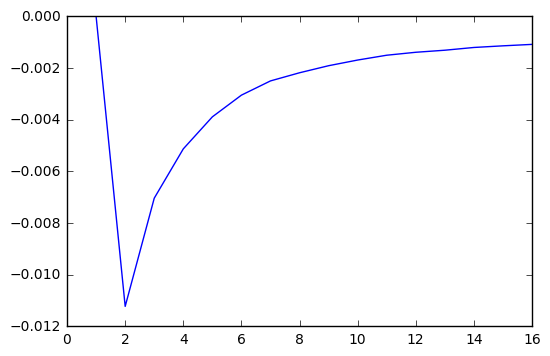

In [9]:
keep_train = True
layers = 1
score_list = [0]

while keep_train:
    pca.fit(X_train)
    train_tmp_pca = pca.transform(X_train)
    test_tmp_pca = pca.transform(X_test)
    
    rf.fit(X_train, y_train)
    train_tmp_svc = rf.predict(X_train)
    test_tmp_svc = rf.predict(X_test)
    
    SLR.fit(X_train, y_train)
    train_tmp_slc = SLR.predict(X_train)
    test_tmp_slc = SLR.predict(X_test)
    
    PTR.fit(X_train, y_train)
    train_tmp_ptc = PTR.predict(X_train)
    test_tmp_ptc = PTR.predict(X_test)
    
    X_train = np.column_stack([train_tmp_pca,train_tmp_svc,train_tmp_slc,train_tmp_ptc])
    X_test = np.column_stack([test_tmp_pca,test_tmp_svc,test_tmp_slc,test_tmp_ptc])
    
    cvscore = cv_score(elasnet)
    testscore = generate_score(elasnet)
    score_list.append(cvscore)
    
    elasnet.fit(X_train, y_train)
    train_pred = elasnet.predict(X_train)
    test_pred = elasnet.predict(X_test)
    
    X_train =  np.column_stack([Xtrain,train_pred])
    X_test = np.column_stack([Xtest,test_pred])
    
    print('Layer {}:'.format(layers))
    print('CV Score: {:.6f}, Test Score: {:.6f}'.format(cvscore, testscore))
    
    layers += 1
    
    if layers > 15:
        keep_train = False
        
        
import matplotlib.pyplot as plt
plt.plot(list(range(layers+1))[1:],score_list)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from tree import RandomDecisionTreeClassifier
from Randomlearners import MajorVoting
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from Ensembler import Bootstrap,Softmax
weight = np.repeat(1/x_tr.shape[0],x_tr.shape[0])
def proc_w(l1,l2,w):
    error = accuracy_score(l1,l2)
    
    alpha = 1/2 * np.log((1-error) / max(error, 1e-6))
    
    c_idx = []
    
    for idx,v in enumerate(l1):
        if v != l2[idx]:
            c_idx.append(idx)
            
    for i in range(len(w)):
        if i in c_idx:
            w[i] = w[i]*np.exp(alpha)
        else:
            w[i] = w[i]*np.exp(-1*alpha)
            
    zt = np.sum(w)
    
    w = np.array(w) / zt
    return w


clf1 = LogisticRegression(solver='sag')
clf2 = lda()
clf3 = DecisionTreeClassifier(max_depth=2)
clf4 = KNeighborsClassifier(n_neighbors=1)
clf5 = KNeighborsClassifier(n_neighbors=10)
clfs = [clf1,clf2,clf3,clf4,clf5]

layer2_tr = None
layer2_te = None
for idx,model in enumerate(clfs):
    for i in range(5):
        x,y = Bootstrap(x_tr,y_tr,weight=weight,factor = 0.8)
        model.fit(x, y)
        prdtr = model.predict(x_tr)
        prdte = model.predict(x_te)
        
        if layer2_tr is None:
            layer2_tr = np.array(prdtr)
        else:
            layer2_tr = np.column_stack([layer2_tr,prdtr])
            
        if layer2_te is None:
            layer2_te = np.array(prdte)
        else:
            layer2_te = np.column_stack([layer2_te,prdte])
            
layer3_tr = None
layer3_te = None

for model in [clf1,clf2,clf5]:
    model.fit(layer2_tr, y_tr)
    prdtr = model.predict(layer2_tr)
    prdte = model.predict(layer2_te)
    
    if layer3_tr is None:
        layer3_tr = np.array(prdtr)
    else:
        layer3_tr = np.column_stack([layer3_tr,prdtr])
            
    if layer3_te is None:
        layer3_te = np.array(prdte)
    else:
        layer3_te = np.column_stack([layer3_te,prdte])
    
m = MajorVoting()
trprd = m.fit_transform(layer3_tr)
teprd = m.fit_transform(layer3_te)

print('Train score: {:.6f}'.format(accuracy_score(trprd,y_tr)))
print('Test score: {:.6f}'.format(accuracy_score(teprd,y_te)))


for clf in [clf1,clf2,clf3,clf4,clf5]:
    clf.fit(x_tr,y_tr)
    prd = clf.predict(x_tr)
    print(accuracy_score(prd,y_tr))